In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

In [6]:
X = np.load("eyes_embeddings.npy")
y = np.load("eyes_labels.npy")

print("X shape:", X.shape)
print("Labels:", np.unique(y, return_counts=True))

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X shape: (30, 512)
Labels: (array(['Arched_Eyebrows', 'Narrow_Eyes'], dtype='<U15'), array([25,  5]))


In [7]:
clf = LogisticRegression(max_iter=3000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)

Accuracy: 0.8333333333333334


In [8]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5 0]
 [1 0]]


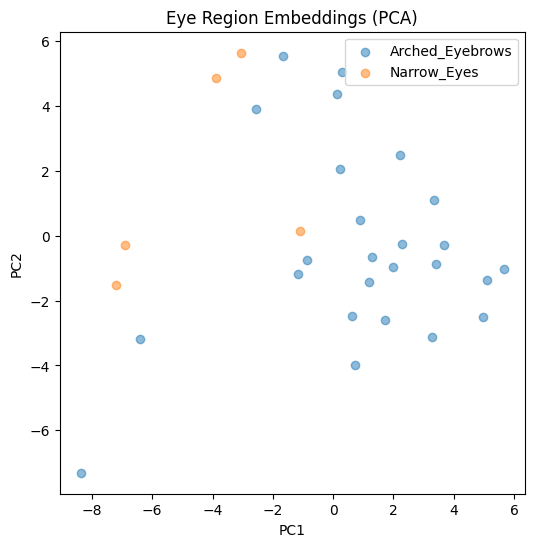

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6,6))
for label in np.unique(y):
    idx = y == label
    plt.scatter(
        X_pca[idx, 0],
        X_pca[idx, 1],
        label=label,
        alpha=0.5
    )

plt.legend()
plt.title("Eye Region Embeddings (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [10]:
def evaluate_region(region_name):
    X = np.load(f"{region_name}_embeddings.npy")
    y = np.load(f"{region_name}_labels.npy")

    Xtr, Xte, ytr, yte = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    clf = LogisticRegression(max_iter=3000)
    clf.fit(Xtr, ytr)

    acc = clf.score(Xte, yte)
    print(f"{region_name} accuracy:", acc)

    return acc